<a href="https://colab.research.google.com/github/kapibara3chi/NLPTesForGC/blob/main/NLPTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pip

In [2]:
!pip  install -U ginza ja_ginza_electra
!pip install plantuml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 KB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 18.0 MB/s eta 0:00:00
  Created wheel for SudachiDict-core: filename=SudachiDict_core-20221021-py3-none-any.whl size=71574782 sha256=d9fbc65c21cdb9b49b978b3d080b47b89efa7eb290b413390bc4e7b01ce77268
  Stor

# Plant UML

[{'filename': 'sample.puml', 'gen_success': True}]


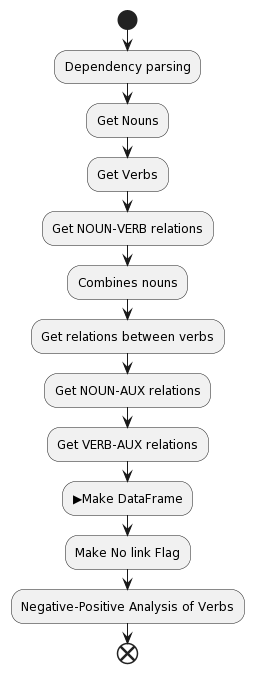

In [3]:
with open('/content/sample.puml', 'w+') as f:
	f.write('''

@startuml
start
:Dependency parsing;
:Get Nouns;
:Get Verbs;
:Get NOUN-VERB relations;
:Combines nouns;
:Get relations between verbs;
:Get NOUN-AUX relations;
:Get VERB-AUX relations;
:▶Make DataFrame;
:Make No link Flag;
:Negative-Positive Analysis of Verbs;
end
@enduml

''')

!python -m plantuml sample.puml

from IPython.display import Image

Image('sample.png')

# Code

In [10]:
import ginza
from spacy import displacy
import spacy
import sys
import pandas as pd
class DependencyAnalysis:
    def __init__(self):
        self.nlp = spacy.load('ja_ginza_electra')
        self.indecies = []
        self.noun_l=[]
        self.verb_l=[]
        self.noun_verb_relation_l=[]
        self.merged_cnoun_l=[]
        self.sent_cnt=0
        cols = ["sent_cnt","i", "orth", "base","head","dep","pos","tag"]
        # self.dependent_indecies_pd = pd.DataFrame(index=[], columns=cols)
        self.depend_indecies_df = pd.DataFrame(index=[], columns=cols)
        self.noun_df = pd.DataFrame(index=[], columns=cols)
        self.verb_df = pd.DataFrame(index=[], columns=cols)
        self.aux_df = pd.DataFrame(index=[], columns=cols)
        output_cols=["ID","NOUN","NOUN_AUX","Category","VERB","VERB_AUX","Pos/Neg","ProductID","Sent","Doc","Nolink",]
        self.output_df = pd.DataFrame(index=[], columns=cols)

    def get_analysis(self, text):
      #**use**
      """係り受け解析"""
      doc = self.nlp(text)
      token_head_list = []

      for sent in doc.sents:
        # self.sent_cnt+=1
        for token in sent:
          token_head_list.append(
            {"sent_cnt":self.sent_cnt,"i": token.i, "orth": token.orth_, "base": token.lemma_,
              "head": token.head.i, "dep": token.dep_,"pos":token.pos_,
              "tag":token.tag_})
          # depend_indecies_df_tmp=pd.DataFrame({"sent_cnt":self.sent_cnt,"i": [token.i], 
          #                      "orth": [token.orth_], "base":[token.lemma_],
          #                      "head":[token.head.i], "dep": [token.dep_],
          #                      "pos":[token.pos_], "tag":[token.tag_]})
      self.depend_indecies_df_tmp=pd.DataFrame(token_head_list)
      self.depend_indecies_df= pd.concat([self.depend_indecies_df,self.depend_indecies_df_tmp])
      # print(token_head_list)

      displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})
      print("depend_indecies_df_tmp:",self.depend_indecies_df_tmp)
      

      return token_head_list
    # def get(self, text, target):
    #   # 係り受け解析
    #   self.depend_indecies = self.get_analysis(text)
    #   print(self.depend_indecies)

    def get_words(self,  m, head):
        """対象の領域の抽出"""
        
        if m["head"] == head :
            for n in self.depend_indecies:
                self.get_words(m=n, head=m["i"])
                            
            self.indecies.append(m["i"])
        
        return
    def get(self, text, target):
        
        # 係り受け解析
        self.depend_indecies = self.get_analysis(text)
        # print(self.depend_indecies)
        for i in self.depend_indecies:
          print(i)
                
        # 係り元のインデックスを取得
        head = self.depend_indecies[target]["head"]
        # print(head)

        # 係り元のかかり先を探索
        self.indecies.append(head)
        print(self.indecies)#list of head?
        for m in self.depend_indecies:
            if m["head"] == head and m["dep"] != "ROOT":
                self.get_words(m, head=head)

        clause = ""
        for clause_num in sorted(self.indecies):
            clause = clause + str(self.depend_indecies[clause_num]["orth"])
            
        return clause



    def get_dat(self,df,get_clm,get_l,ex_clm,ex_l):
      # **use**
      df=df[df[get_clm].isin(get_l)]
      df=df[~df[ex_clm].isin(ex_l)]
      return df

    def get_noun_old(self):
      # **use**
      # print(type(self.depend_indecies))
      # noun_l=[i for i in self.depend_indecies if "名詞" in i["tag"]]

      ex_l=["こと"]
      pos_l=["NOUN","PROPN","NUM","SYM"]
      noun_l=[i for i in self.depend_indecies if "NOUN" in i["pos"] or "PROPN" in i["pos"] or "NUM" in i["pos"]or "SYM" in i["pos"]]
      noun_l=[i for i in noun_l if not i["base"] in ex_l]

      # self.noun_df_tmp=self.depend_indecies_df_tmp[self.depend_indecies_df_tmp["pos"].isin(pos_l)]
      # self.noun_df_tmp=self.noun_df_tmp[~self.noun_df_tmp["base"].isin(ex_l)]
      self.noun_df_tmp=self.get_dat(self.depend_indecies_df_tmp,"pos",pos_l,"base",ex_l)
      print("noun_df_tmp",self.noun_df_tmp)

      self.noun_df=pd.concat([self.noun_df,self.noun_df_tmp])
      # print("noun_df",self.noun_df)
      return noun_l

    def get_noun(self):
      # **use**

      ex_l=["こと"]
      pos_l=["NOUN","PROPN","NUM","SYM"]
      # noun_l=[i for i in self.depend_indecies if "NOUN" in i["pos"] or "PROPN" in i["pos"] or "NUM" in i["pos"]or "SYM" in i["pos"]]
      # noun_l=[i for i in noun_l if not i["base"] in ex_l]

      self.noun_df_tmp=self.get_dat(self.depend_indecies_df_tmp,"pos",pos_l,"base",ex_l)
      print("noun_df_tmp",self.noun_df_tmp)

      self.noun_df=pd.concat([self.noun_df,self.noun_df_tmp])
      # print("noun_df",self.noun_df)
      # return noun_l
   
    def get_verb(self):
      # **use**
      # verb_l=[i for i in self.depend_indecies if "VERB" in i["pos"]]
      ex_l=["する","おく"]
      pos_l=["VERB"]
      # verb_l=[i for i in verb_l if not i["base"] in ex_l]
      # print(verb_l)

      # self.verb_df=self.depend_indecies_df[self.depend_indecies_df["pos"]=="VERB"]
      # self.verb_df=self.verb_df[self.verb_df["base"].isin(ex_l)]
      # print(self.verb_df)
      self.verb_df_tmp=self.get_dat(self.depend_indecies_df_tmp,"pos",pos_l,"base",ex_l)
      print("verb_df_tmp",self.verb_df_tmp)
      self.verb_df=pd.concat([self.verb_df,self.verb_df_tmp])
      # return verb_l

    def get_aux(self):
      # **use**
      # aux_l=[i for i in self.depend_indecies if "AUX" in i["pos"]]
      ex_l=[]
      pos_l=["AUX"]
      # aux_l=[i for i in aux_l if not i["base"] in ex_l]

      self.aux_df_tmp=self.get_dat(self.depend_indecies_df_tmp,"pos",pos_l,"base",ex_l)
      print("aux_df_tmp",self.aux_df_tmp)
      self.aux_df=pd.concat([self.aux_df,self.aux_df_tmp])
      # return aux_l

    def seek_verb(self,noun,seek="VERB"): 
      #Find verb from noun
      if noun is None:
        return
      parents_idx=noun["head"]
      if noun["i"]==noun["head"]:
        # print("same index")
        return
      # print(parents_idx)
      if self.depend_indecies[parents_idx]["pos"]=="VERB":
        # print("VERB",self.depend_indecies[parents_idx])
        return self.depend_indecies[parents_idx]
        # print("error")
      elif self.depend_indecies[parents_idx]["dep"]=="ROOT":
        print("ROOT END") 
        return
      else:
        # print("loop")
        return self.seek_verb(self.depend_indecies[parents_idx])

    def seek_ances_word_df(self,series,seek_wrd): 
      # **use**
      #Find ancestor word from df
      parents_idx=series["head"]
      # print(parents_idx)
      p_dat=self.depend_indecies_df_tmp[(self.depend_indecies_df_tmp["i"]==parents_idx)]
      p_dat=p_dat.iloc[0,:]
      pos=p_dat["pos"]
      if pos==seek_wrd:
        # print("pos",pos)
        # print(type(pos))
        # print(p_dat)
        return p_dat["i"]
        # print("error")
      elif p_dat["dep"]=="ROOT":
        # print("ROOT END") 
        return
      else:
        # print("loop")
        # print("**series**",series)
        # print("p_dat*:",p_dat)
        # print("-"*10)
        return self.seek_ances_word_df(p_dat,seek_wrd)

    def seek_word(self,noun,seek): 
      #Find verb from noun
      if noun is None:
        return
      parents_idx=noun["head"]
      if noun["i"]==noun["head"]:
        # print("same index")
        return
      # print(parents_idx)
      if self.depend_indecies[parents_idx]["pos"]==seek:
        # print("VERB",self.depend_indecies[parents_idx])
        return self.depend_indecies[parents_idx]
        # print("error")
      elif self.depend_indecies[parents_idx]["dep"]=="ROOT":
        # print("ROOT END") 
        return
      else:
        # print("loop")
        return self.seek_word(self.depend_indecies[parents_idx],seek)

    def merge_set(self,set_l):
      merged_set_l=[]
      if len(set_l)==1:
        merged_set_l=set_l
        return merged_set_l

      for i in range(len(set_l)):
        itm=set_l.pop(0)
        # print("loop",i)
        # print("list:",set_l)
        # print("i:",i,"pop itm:",itm)
        flag=False
        # print("len(set_l)",len(set_l))
        if len(set_l)==0:
          itm_l=list(itm)
          itm_l.sort()
          merge_word=self.make_compound_word(itm_l)
          merged_set_l.append([itm_l,merge_word])
          # print("len=0 break")
          break
        for idx,j in enumerate(set_l):
          if len(itm & j) !=0:
            mrg=itm | j
            set_l[idx]=mrg
            flag=True
            # print("merge:",mrg)
            break
        if flag==False:
          itm_l=list(itm)
          itm_l.sort()
          merge_word=self.make_compound_word(itm_l)
          merged_set_l.append([itm_l,merge_word])
        # print("merged list:",merged_set_l)
        # print("-"*10)
      # print("="*100)
      # print(merged_set_l)
      # print("="*100)
      return merged_set_l

    def make_compound_word(self,merged_cnoun_l):
      cnoun=""
      for i in merged_cnoun_l:
        # print("i",i)
        for l in self.depend_indecies:
          if l["i"]==i:
            cnoun+=l["orth"]
      # print(cnoun)
      return cnoun

    def make_compound_nouns_old(self):
      print(self.depend_indecies)
      # find compound and nummod
      cnoun_l=[[i,self.depend_indecies[i["head"]]] for i in self.depend_indecies if i["dep"]=="compound" or i["dep"]=="nummod"]

      #find compound index
      merge_cnoun_l=[{m["i"] for m in l} for l in cnoun_l]
      # print("merge_cnoun_l:",merge_cnoun_l)

      #merge noun
      merged_cnoun_l=[]
      # merge_cnoun_l=[{0,1}]
      if len(merge_cnoun_l)==1:
        # print("merge cnoun_l=1:",merge_cnoun_l)
        itm_l=list(merge_cnoun_l[0])
        itm_l.sort()
        merge_word=self.make_compound_word(itm_l)
        merged_cnoun_l.append([itm_l,merge_word])
      else:
        merged_cnoun_l=self.merge_set(merge_cnoun_l)
        # print("merged cnoun_l:",merged_cnoun_l)

      return merged_cnoun_l

    def make_compound_nouns(self):
      # print(self.depend_indecies)
      # find compound and nummod
      # cnoun_l=[[i,self.depend_indecies[i["head"]]] for i in self.depend_indecies if i["dep"]=="compound" or i["dep"]=="nummod"]
      # print("cnoun_l",cnoun_l)

      dep_l=["compound","nummod"]
      
      # cnoun_tmp_df=self.depend_indecies_df_tmp[self.depend_indecies_df_tmp["dep"].isin(dep_l)]
      cnoun_tmp_df=self.noun_df_tmp[self.noun_df_tmp["dep"].isin(dep_l)]
      i_l_df=cnoun_tmp_df[["i","head"]]
      merge_cnoun_l=[{i[1]["i"],i[1]["head"]} for i in i_l_df.iterrows()]
      
      ##filtter noun
      # print("*"*10)
      # for i in i_l_df.iterrows():
      #   print(i)
      #   tmp=self.depend_indecies_df_tmp[(self.depend_indecies_df_tmp["i"]==i[1]["i"])]["pos"]
      #   print(tmp)
      # print("cnoun_l from df:",merge_cnoun_l)
      # print("df cnoun_l:",i_l_df)
      merge_cnoun_l2=[]

      #find compound index
      # merge_cnoun_l=[{m["i"] for m in l} for l in cnoun_l]
      print("merge_cnoun_l:",merge_cnoun_l)
      # sys.exit( )

      #merge noun
      merged_cnoun_l=[]
      # merge_cnoun_l=[{0,1}]
      if len(merge_cnoun_l)==1:
        # print("merge cnoun_l=1:",merge_cnoun_l)
        itm_l=list(merge_cnoun_l[0])
        itm_l.sort()
        merge_word=self.make_compound_word(itm_l)
        merged_cnoun_l.append([itm_l,merge_word])
      else:
        merged_cnoun_l=self.merge_set(merge_cnoun_l)
        # print("merged cnoun_l:",merged_cnoun_l)

      return merged_cnoun_l


      
    def seek_noun_all(self,noun,cnoun_l):
      #Find noun from noun
      parents_idx=noun["head"]
      # print(parents_idx)

      if noun["dep"]=="compound" or noun["dep"]=="nummod":
        cnoun_l.append(self.depend_indecies[parents_idx])
      else:
        return cnoun_l

      '''
      if self.depend_indecies[parents_idx]["pos"]=="NOUN" or self.depend_indecies[parents_idx]["pos"]=="PROPN" or self.depend_indecies[parents_idx]["pos"]=="NUM":
        cnoun_l.append(self.depend_indecies[parents_idx])
        # print("VERB",self.depend_indecies[parents_idx])
        return self.seek_noun_all(self.depend_indecies[parents_idx],cnoun_l)
        # print("error")
      else:
        return cnoun_l
      '''
    def get_noun_verb_rel(self):
        noun_verb_rel_l=[]
        for i in self.noun_l:
          # print("noun:",i)
          verb=self.seek_verb(i)
          # print("verb:",verb)
          tmp=[i,verb]
          noun_verb_rel_l.append(tmp)

        self.noun_verb_relation_l=noun_verb_rel_l

    def get_unique_list(self,seq):
      #Remove duplicates from the list
        seen = []
        return [x for x in seq if x not in seen and not seen.append(x)]

    def get_verb_verb_rel(self):
        verb_verb_l=[]
        for i in self.noun_verb_relation_l:
          prt_idx=self.seek_verb(i[1])
          # print("verb:",i[1])
          # print("prt_verb:",prt_idx)
          if prt_idx is not None:
            tmp_l=[i[1]["i"],prt_idx["i"]]
            verb_verb_l.append(tmp_l)
        # print(verb_verb_l)
        return self.get_unique_list(verb_verb_l)
        
    def get_rel(self,word_l,seek_str):
        rel_l=[]
        for i in word_l:
          # print("noun:",i)
          verb=self.seek_word(i,seek_str)
          # print("verb:",verb)
          if verb is not None:
            tmp=[i["i"],verb]
            rel_l.append(tmp)
        return rel_l

    def get_rel_prt_df(self,word_df,seek_str):
      # **use**
      # print(type(word_df))
      rel_l=[]
      for itm  in word_df.iterrows():
        # print(type(itm))
        # print(itm)
        i=itm[1]["i"]
        val=self.depend_indecies_df_tmp[(self.depend_indecies_df_tmp["i"]==itm[1]["head"])&(self.depend_indecies_df_tmp["pos"]==seek_str)]
        if not val.empty:
          # print("i:",i)
          # print("head:",itm[1]["head"])
          val=val["i"].iloc[0]
          if i !=val:
            continue
          # print("pos:",val)
          rel_l.append([i,val])

      print(rel_l)
      print("-"*10)
      return rel_l

    def get_rel_prt_intr_df(self,df1,df2):
      # **use**
      # print("df1:",df1)
      # print("df2:",df2)
      rel_l=[]
      i1_l=list(df1["i"].values)
      i2_l=list(df2["i"].values)
      # print("df2:",i2_l)
      for i in i1_l:
        head=df1[(df1["i"]==i)]["head"].iloc[0]
        if head  in i2_l:
          rel_l.append([i,head])

      for i in i2_l:
        head=df2[(df2["i"]==i)]["head"].iloc[0]
        if head  in i1_l:
          rel_l.append([i,head])
      # print(rel_l)

      return rel_l
      # for itm  in word_df.iterrows():
      #   # print(type(itm))
      #   # print(itm)
      #   i=itm[1]["i"]
      #   val=self.depend_indecies_df_tmp[(self.depend_indecies_df_tmp["i"]==itm[1]["head"])&(self.depend_indecies_df_tmp["pos"]==seek_str)]
      #   if not val.empty:
      #     # print("i:",i)
      #     # print("head:",itm[1]["head"])
      #     val=val["i"].iloc[0]
      #     if i !=val:
      #       continue
      #     # print("pos:",val)
      #     rel_l.append([i,val])

      # print(rel_l)
      # print("-"*10)
      # return rel_l

    def get_rel_df(self,df,pos_str):
      # **use**
      if df.empty:
        return
      rel_l=[]
      for i in df.iterrows():
        # print(i[1]["i"],type(i[1]))
        stop_idx=self.seek_ances_word_df(i[1],pos_str)
        # print(type(stop_idx))
        # print("stop:",stop_idx)
        if i[1]["i"]!= stop_idx and stop_idx is not None:
          rel_l.append([i[1]["i"],stop_idx])
      
      # print("output:",rel_l)
      return rel_l

    def make_output_df(self):
      #get noun-verb
      dat_tmp_idx=[]
      dat_tmp_idx_dict={}
      for i in self.noun_verb_l:
        dat_tmp_idx_dict={"NOUN":i[0],"NOUN_AUX":None,"VERB":i[1],"VERB_AUX":None}
        #get noun-aux
        for k in self.noun_aux_l:
          if k[0]==dat_tmp_idx_dict["NOUN"]:
            dat_tmp_idx_dict["NOUN_AUX"]=k[1]
            break
        #get verb-aux
        for k in self.verb_aux_l:
          if k[0]==dat_tmp_idx_dict["VERB"]:
            dat_tmp_idx_dict["VERB_AUX"]=k[1]
            break
        #add_list
        ##exclude the same data
        if dat_tmp_idx_dict not in dat_tmp_idx:
          dat_tmp_idx.append(dat_tmp_idx_dict)



      print("dat_tmp_l",dat_tmp_idx)
      
      #get noun only
      

    def dep_analysis_main(self,text):
        # 係り受け解析
        self.depend_indecies = self.get_analysis(text)

        # print(self.depend_indecies)
        # for i in self.depend_indecies:
        #   print(i)
        # print("-"*100)

        #get NOUN
        self.noun_l=self.get_noun()
        # for l in self.noun_l:
        #   print(l)

        #get VERB
        self.verb_l=self.get_verb()
        # for l in verb_l:
        #   print(l)
        
        #get AUX
        self.aux_l=self.get_aux()

        #get NOUN-VERB relations
        self.noun_verb_l=self.get_rel_df(self.noun_df_tmp,"VERB")
        print("noun-verb list:",self.noun_verb_l)

        # self.get_noun_verb_rel()
        # for i in self.noun_verb_relation_l:
        #   print("noun:",i[0])
        #   print("verb:",i[1])
        # print("-"*100)
        # sys.exit()
        
        #get compound nouns
        # for i in noun_l:
          # c_cnouns_l=self.make_compound_nouns(i)
        # print(noun_l[0])
        self.merged_cnoun_l=self.make_compound_nouns()
        print("merged cnoun list:",self.merged_cnoun_l)

        #get VERB-VERB relations
        # verb_verb_l=self.get_verb_verb_rel()

        verb_verb_l=self.get_rel_df(self.verb_df_tmp,"VERB")
        print("verb-verb list:",verb_verb_l)

        #Get NOUN-AUX relations;
        # self.noun_aux_rel=self.get_rel(self.noun_l,"AUX")
        # self.noun_aux_rel=self.get_rel_df(self.noun_df_tmp,"AUX")
        self.noun_aux_l=self.get_rel_prt_intr_df(self.noun_df_tmp,self.aux_df_tmp)
        print("noun-aux list:",self.noun_aux_l)

        #Get VERB-AUX relations;
        # self.get_rel_prt_df(self.noun_df,"VERB")
        self.verb_aux_l=self.get_rel_prt_intr_df(self.verb_df_tmp,self.aux_df_tmp)
        print("verb-aux list:",self.verb_aux_l)

        #Make DataFrame;
        self.make_output_df()
        print(self.output_df)
        
        #Make No link Flag;

        #Negative-Positive Analysis of Verbs;


if __name__ == '__main__':
  dependency = DependencyAnalysis()
  txt_l=["下流あごを2mmだすと分離は改善するが、コンタミが悪化する。",
         "非通紙部昇温時のxx75において発生する。",
         "下流あごを出すこととオフセットを0.2mmにすることより解決する",
         "上流あごは分離に影響を与えない。オフセットの増加は分離に関係ない",
         "下流あごの増加による分離悪化を説明できない",
         "下流あごと分離は無関係である",
         "オフセットと分離は関係ある",
         "上流オフセットでは分離は改善しない"]
  # ret=dependency.get_analysis("下流あごをだすと分離は改善するが、コンタミが悪化する")
  # for i in ret:
    # print(i)
  for txt in txt_l:
    # ret=dependency.get(txt,0)
    # print(ret)
    dependency.sent_cnt+=1
    dependency.dep_analysis_main(txt)
  print(dependency.depend_indecies_df)
  print(dependency.noun_df)
  print(dependency.verb_df)


depend_indecies_df_tmp:     sent_cnt   i  orth  base  head       dep    pos            tag
0          1   0    下流    下流     1  compound   NOUN     名詞-普通名詞-一般
1          1   1    あご    あご     5       obj   NOUN     名詞-普通名詞-一般
2          1   2     を     を     1      case    ADP         助詞-格助詞
3          1   3     2     2     4    nummod    NUM          名詞-数詞
4          1   4    mm    mm     5       obl   NOUN  名詞-普通名詞-助数詞可能
5          1   5    だす    だす     9     advcl   VERB       動詞-非自立可能
6          1   6     と     と     5      mark  SCONJ        助詞-接続助詞
7          1   7    分離    分離     9     nsubj   NOUN   名詞-普通名詞-サ変可能
8          1   8     は     は     7      case    ADP         助詞-係助詞
9          1   9    改善    改善    15     advcl   VERB   名詞-普通名詞-サ変可能
10         1  10    する    する     9       aux    AUX       動詞-非自立可能
11         1  11     が     が     9      mark  SCONJ        助詞-接続助詞
12         1  12     、     、     9     punct  PUNCT        補助記号-読点
13         1  13  コンタミ  コンタミ    15    

depend_indecies_df_tmp:     sent_cnt   i orth base  head       dep    pos            tag
0          2   0    非    非     5  compound   NOUN            接頭辞
1          2   1    通    通     5  compound   NOUN  名詞-普通名詞-形状詞可能
2          2   2    紙    紙     5  compound   NOUN     接尾辞-名詞的-一般
3          2   3    部    部     5  compound   NOUN  名詞-普通名詞-助数詞可能
4          2   4   昇温   昇温     5  compound   NOUN     名詞-普通名詞-一般
5          2   5    時    時     8      nmod   NOUN  名詞-普通名詞-助数詞可能
6          2   6    の    の     5      case    ADP         助詞-格助詞
7          2   7   xx   xx     8  compound    SYM     名詞-普通名詞-一般
8          2   8   75   75    12       obl    NUM          名詞-数詞
9          2   9    に    に     8      case    ADP         助詞-格助詞
10         2  10   おい   おく     9     fixed   VERB          動詞-一般
11         2  11    て    て     9     fixed  SCONJ        助詞-接続助詞
12         2  12   発生   発生    12      ROOT   VERB   名詞-普通名詞-サ変可能
13         2  13   する   する    12       aux    AUX       動詞-非自立可能
1

depend_indecies_df_tmp:     sent_cnt   i   orth   base  head       dep   pos            tag
0          3   0     下流     下流     1  compound  NOUN     名詞-普通名詞-一般
1          3   1     あご     あご     3       obj  NOUN     名詞-普通名詞-一般
2          3   2      を      を     1      case   ADP         助詞-格助詞
3          3   3     出す     出す     4       acl  VERB       動詞-非自立可能
4          3   4     こと     こと    12      nmod  NOUN     名詞-普通名詞-一般
5          3   5      と      と     4      case   ADP         助詞-格助詞
6          3   6  オフセット  オフセット    11       obj  NOUN     名詞-普通名詞-一般
7          3   7      を      を     6      case   ADP         助詞-格助詞
8          3   8    0.2    0.2     9  compound   NUM          名詞-数詞
9          3   9     mm     mm    11       obl  NOUN  名詞-普通名詞-助数詞可能
10         3  10      に      に     9      case   ADP         助詞-格助詞
11         3  11     する     する    12       acl  VERB       動詞-非自立可能
12         3  12     こと     こと    14       obl  NOUN     名詞-普通名詞-一般
13         3  13     より 

depend_indecies_df_tmp:     sent_cnt   i   orth   base  head       dep    pos           tag
0          4   0     上流     上流     1  compound   NOUN    名詞-普通名詞-一般
1          4   1     あご     あご     7     nsubj   NOUN    名詞-普通名詞-一般
2          4   2      は      は     1      case    ADP        助詞-係助詞
3          4   3     分離     分離     7       obl   NOUN  名詞-普通名詞-サ変可能
4          4   4      に      に     3      case    ADP        助詞-格助詞
5          4   5     影響     影響     7       obj   NOUN  名詞-普通名詞-サ変可能
6          4   6      を      を     5      case    ADP        助詞-格助詞
7          4   7     与え    与える     7      ROOT   VERB         動詞-一般
8          4   8     ない     ない     7       aux    AUX           助動詞
9          4   9      。      。     7     punct  PUNCT       補助記号-句点
10         4  10  オフセット  オフセット    12      nmod   NOUN    名詞-普通名詞-一般
11         4  11      の      の    10      case    ADP        助詞-格助詞
12         4  12     増加     増加    16     nsubj   NOUN  名詞-普通名詞-サ変可能
13         4  13      は 

depend_indecies_df_tmp:     sent_cnt   i orth base  head       dep   pos           tag
0          5   0   下流   下流     1  compound  NOUN    名詞-普通名詞-一般
1          5   1   あご   あご     3      nmod  NOUN    名詞-普通名詞-一般
2          5   2    の    の     1      case   ADP        助詞-格助詞
3          5   3   増加   増加     7      nmod  NOUN  名詞-普通名詞-サ変可能
4          5   4    に    に     3      case   ADP        助詞-格助詞
5          5   5   よる   よる     4     fixed  VERB         動詞-一般
6          5   6   分離   分離     7  compound  NOUN  名詞-普通名詞-サ変可能
7          5   7   悪化   悪化     9       obj  NOUN  名詞-普通名詞-サ変可能
8          5   8    を    を     7      case   ADP        助詞-格助詞
9          5   9   説明   説明     9      ROOT  VERB  名詞-普通名詞-サ変可能
10         5  10   でき  できる     9       aux   AUX      動詞-非自立可能
11         5  11   ない   ない     9       aux   AUX           助動詞
noun_df_tmp    sent_cnt  i orth base  head       dep   pos           tag
0         5  0   下流   下流     1  compound  NOUN    名詞-普通名詞-一般
1         5  1   あご   あ

depend_indecies_df_tmp:    sent_cnt  i orth base  head       dep   pos            tag
0         6  0   下流   下流     1  compound  NOUN     名詞-普通名詞-一般
1         6  1   あご   あご     3      nmod  NOUN     名詞-普通名詞-一般
2         6  2    と    と     1      case   ADP         助詞-格助詞
3         6  3   分離   分離     5     nsubj  NOUN   名詞-普通名詞-サ変可能
4         6  4    は    は     3      case   ADP         助詞-係助詞
5         6  5  無関係  無関係     5      ROOT  NOUN  名詞-普通名詞-形状詞可能
6         6  6    で    だ     5       cop   AUX            助動詞
7         6  7   ある   ある     6     fixed  VERB       動詞-非自立可能
noun_df_tmp    sent_cnt  i orth base  head       dep   pos            tag
0         6  0   下流   下流     1  compound  NOUN     名詞-普通名詞-一般
1         6  1   あご   あご     3      nmod  NOUN     名詞-普通名詞-一般
3         6  3   分離   分離     5     nsubj  NOUN   名詞-普通名詞-サ変可能
5         6  5  無関係  無関係     5      ROOT  NOUN  名詞-普通名詞-形状詞可能
verb_df_tmp    sent_cnt  i orth base  head    dep   pos       tag
7         6  7   ある   ある     6

depend_indecies_df_tmp:    sent_cnt  i   orth   base  head       dep   pos           tag
0         7  0  オフセット  オフセット     2      nmod  NOUN    名詞-普通名詞-一般
1         7  1      と      と     0      case   ADP        助詞-格助詞
2         7  2     分離     分離     4     nsubj  NOUN  名詞-普通名詞-サ変可能
3         7  3      は      は     2      case   ADP        助詞-係助詞
4         7  4     関係     関係     4      ROOT  NOUN  名詞-普通名詞-サ変可能
5         7  5     ある     ある     4  compound  VERB      動詞-非自立可能
noun_df_tmp    sent_cnt  i   orth   base  head    dep   pos           tag
0         7  0  オフセット  オフセット     2   nmod  NOUN    名詞-普通名詞-一般
2         7  2     分離     分離     4  nsubj  NOUN  名詞-普通名詞-サ変可能
4         7  4     関係     関係     4   ROOT  NOUN  名詞-普通名詞-サ変可能
verb_df_tmp    sent_cnt  i orth base  head       dep   pos       tag
5         7  5   ある   ある     4  compound  VERB  動詞-非自立可能
aux_df_tmp Empty DataFrame
Columns: [sent_cnt, i, orth, base, head, dep, pos, tag]
Index: []
noun-verb list: []
merge_cnoun_l: []
merge

depend_indecies_df_tmp:    sent_cnt  i   orth   base  head       dep   pos           tag
0         8  0     上流     上流     1  compound  NOUN    名詞-普通名詞-一般
1         8  1  オフセット  オフセット     6       obl  NOUN    名詞-普通名詞-一般
2         8  2      で      で     1      case   ADP        助詞-格助詞
3         8  3      は      は     1      case   ADP        助詞-係助詞
4         8  4     分離     分離     6     nsubj  NOUN  名詞-普通名詞-サ変可能
5         8  5      は      は     4      case   ADP        助詞-係助詞
6         8  6     改善     改善     6      ROOT  VERB  名詞-普通名詞-サ変可能
7         8  7      し     する     6       aux   AUX      動詞-非自立可能
8         8  8     ない     ない     6       aux   AUX           助動詞
noun_df_tmp    sent_cnt  i   orth   base  head       dep   pos           tag
0         8  0     上流     上流     1  compound  NOUN    名詞-普通名詞-一般
1         8  1  オフセット  オフセット     6       obl  NOUN    名詞-普通名詞-一般
4         8  4     分離     分離     6     nsubj  NOUN  名詞-普通名詞-サ変可能
verb_df_tmp    sent_cnt  i orth base  head   dep   pos